<center><h1>🏆IPL DATA ANALYSIS AND MATCH PREDICTION🏆</h1></center>

In [1]:
#importing all libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#show dataset values
matches=pd.read_csv(r'C:\Users\TS\Dataset\matches.csv')
deliveries=pd.read_csv(r'C:\Users\TS\Dataset\deliveries.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

## DATASET ANALYSIS 

In [3]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### DATA CLEANING

In [4]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [5]:
#remove any null values, winner has hence fill the null value in winner as draw
matches['winner'].fillna('Draw', inplace=True)

In [6]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [7]:
#City is also null
matches['city'].fillna('Singapore',inplace=True)
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [8]:
#to check whether table deliveries contains null entries
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [9]:
print(matches['winner'].unique())
print(matches['city'].unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Draw' 'Rising Pune Supergiants']
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah'
 'Singapore']


In [10]:
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [11]:
matches.replace('Bangalore','Bengaluru', inplace = True)

In [12]:
#fill missing values
matches['player_of_match'].fillna(matches['result'], inplace = True)
matches['umpire1'].fillna('unknown', inplace = True)
matches['umpire2'].fillna('unknown', inplace = True)

### Total number of matches Win by Each Teams

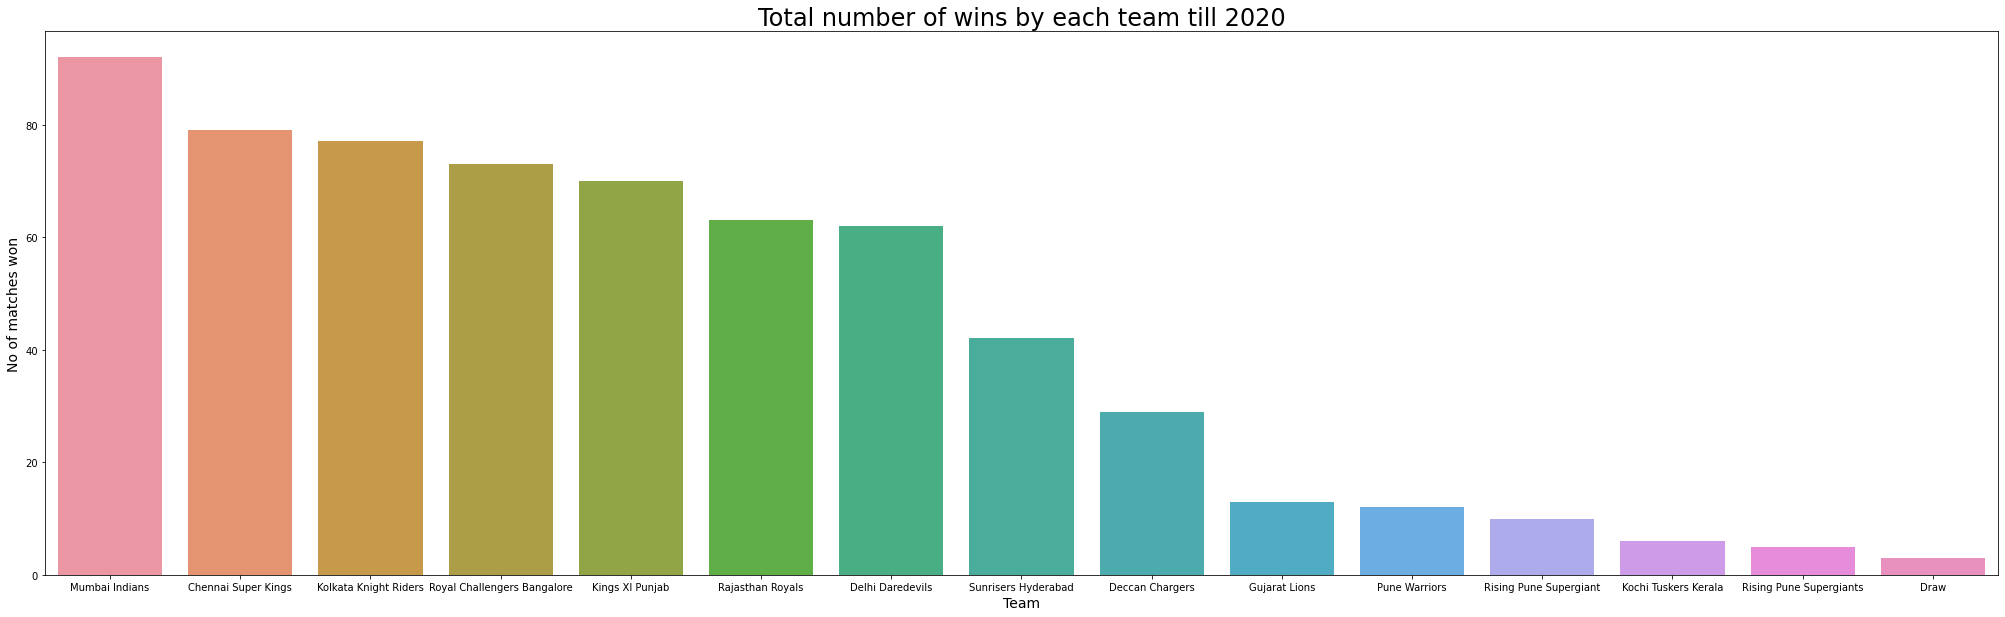

In [13]:
Xv =matches['winner'].value_counts().index
yv = matches['winner'].value_counts().values
df1=pd.DataFrame(list(zip(Xv,yv)),columns = ['X','Y'] ) 
plt.figure(figsize=(35,10)) 
sns.barplot(x = 'X',
            y = 'Y',
            data = df1)
plt.title("Total number of wins by each team till 2020", size=24)
plt.xlabel("Team", size=14)
plt.ylabel("No of matches won", size=14)
plt.show()

### Toss/ Win Ratio

In [14]:
Total_matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()

toss_won = matches['toss_winner'].value_counts()
toss_win_success_rate = (toss_won/Total_matches_played)*100
toss_win_success_rate_sort = toss_win_success_rate.sort_values(ascending = False)

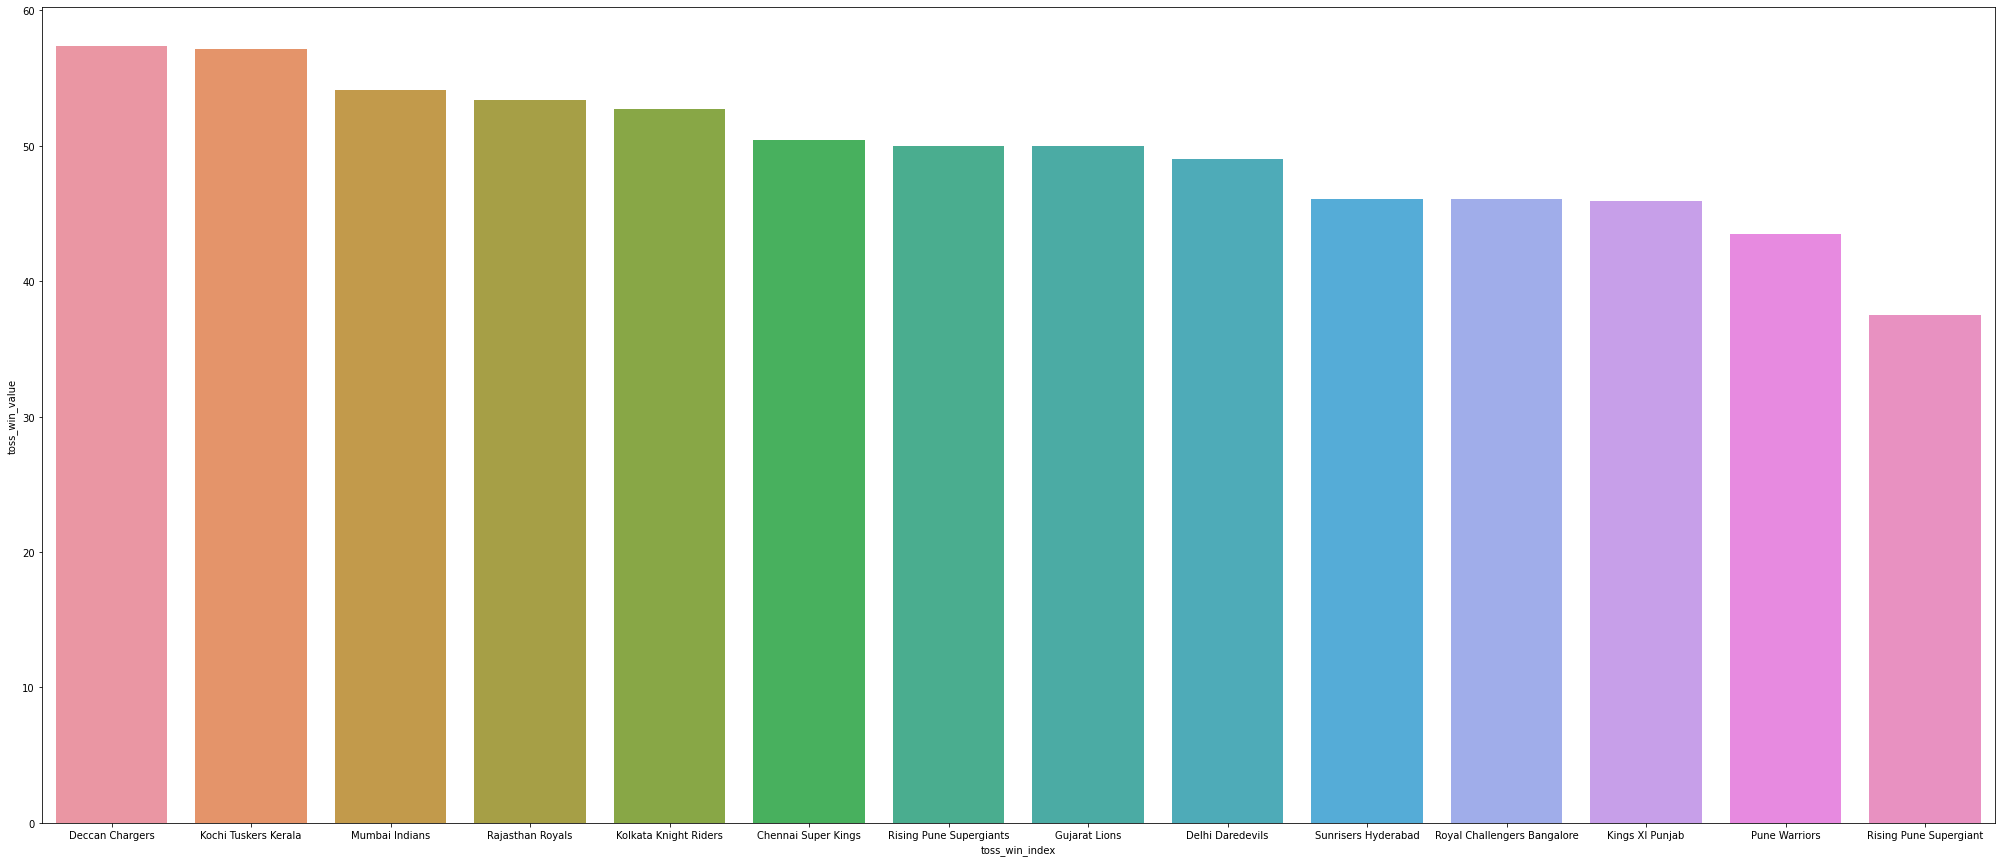

In [15]:
toss_win_index = toss_win_success_rate.sort_values(ascending=False).index
toss_win_value = toss_win_success_rate.sort_values(ascending=False).values
df1=pd.DataFrame(list(zip(toss_win_index,toss_win_value)),columns = ['toss_win_index','toss_win_value'] ) 
plt.figure(figsize=(35,15)) 
sns.barplot(x = 'toss_win_index',
            y = 'toss_win_value',
            data = df1)
plt.show()

## Total number of matches till 2020

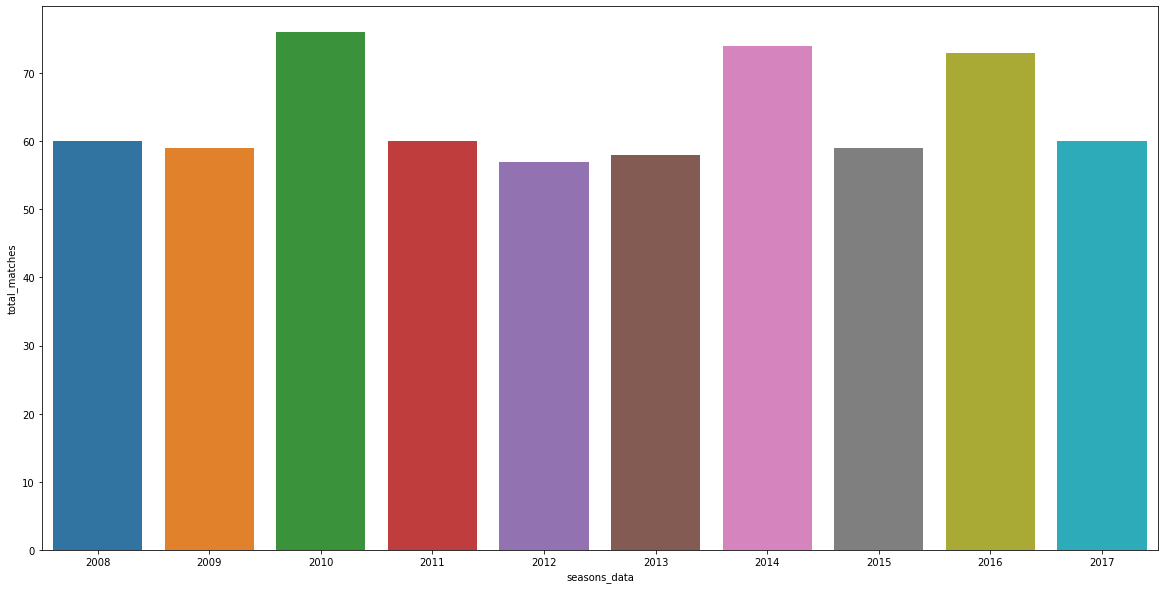

In [16]:
seasons_data = matches["season"].value_counts().index
total_matches = matches.groupby('season')['id'].count().values
df1=pd.DataFrame(list(zip(seasons_data,total_matches)),columns = ['seasons_data','total_matches'] ) 
plt.figure(figsize=(20,10)) 
sns.barplot(x = 'seasons_data',
            y = 'total_matches',
            data = df1)
plt.show()

### Do you know who won the most player of the match?

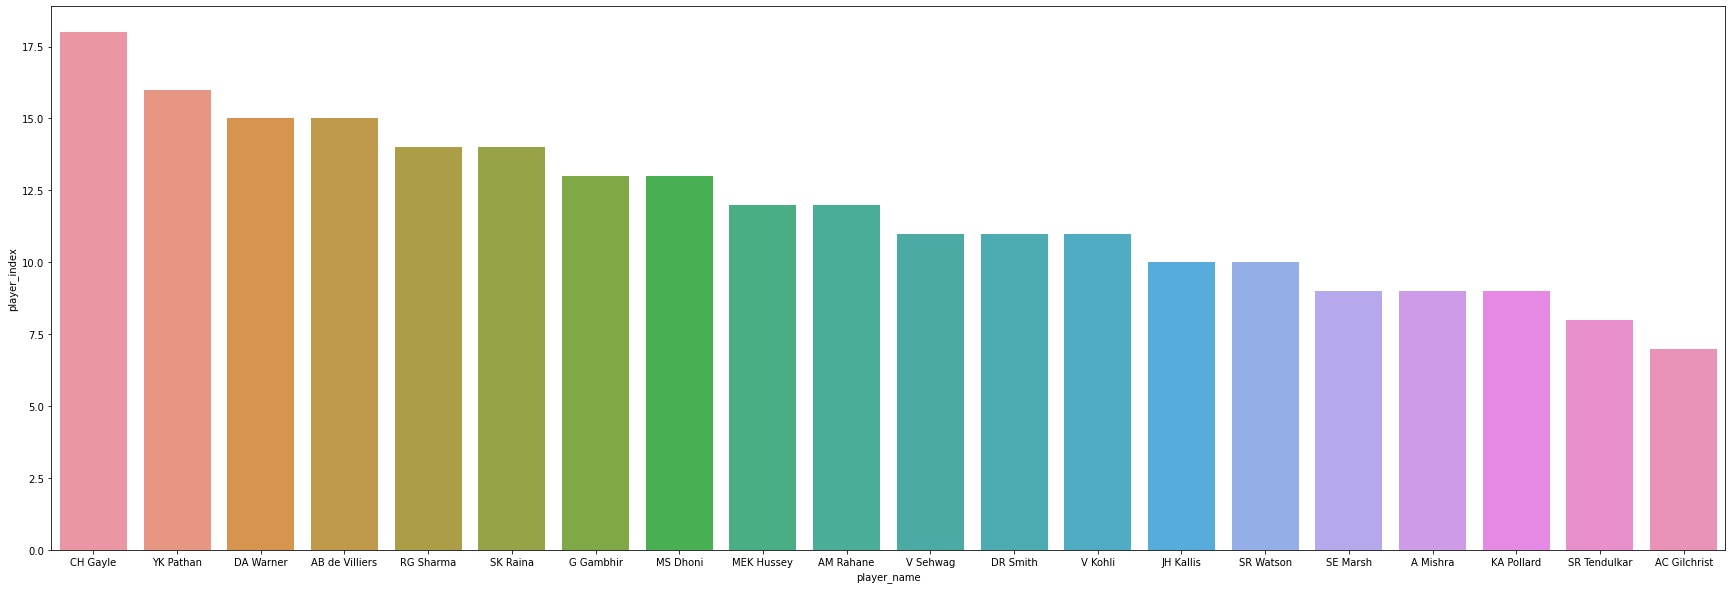

In [17]:
player_index = matches['player_of_match'].value_counts()[:20].index
player_name = matches['player_of_match'].value_counts()[:20].values
df1=pd.DataFrame(list(zip(player_index,player_name)),columns = ['player_name','player_index'] ) 
plt.figure(figsize=(30,10)) 
sns.barplot(x = 'player_name',y = 'player_index',data = df1)
plt.show()

### Success rate of winning matches

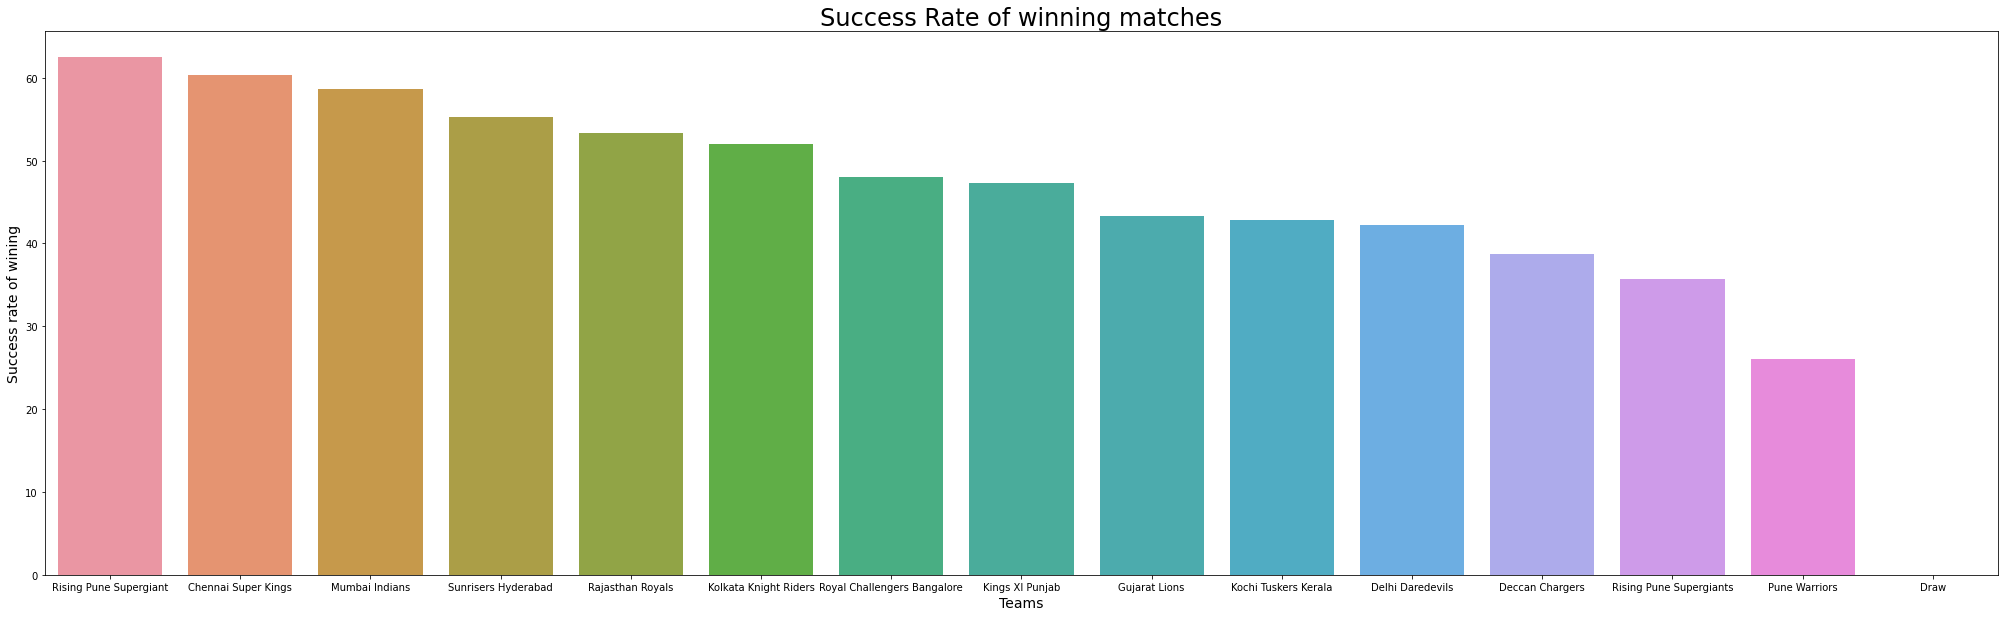

In [18]:
matches_won = matches.groupby('winner').count()
total_matches = matches['team1'].value_counts() + matches['team2'].value_counts()

matches_won['Total matches'] = total_matches
win_df = matches_won[["Total matches","result"]]
success_ratio = round((matches_won['id']/total_matches),4)*100
success_ratio_sort = success_ratio.sort_values(ascending = False)
x = success_ratio_sort.index
y = success_ratio_sort.values
df1=pd.DataFrame(list(zip(x,y)),columns = ['x','y'] ) 
plt.figure(figsize=(35,10)) 
sns.barplot(x = 'x',y = 'y',data = df1)
plt.title("Success Rate of winning matches", size=24)
plt.ylabel("Success rate of wining", size=14)
plt.xlabel("Teams", size=14)
plt.show()

### Top 10 Playes with Most Runs

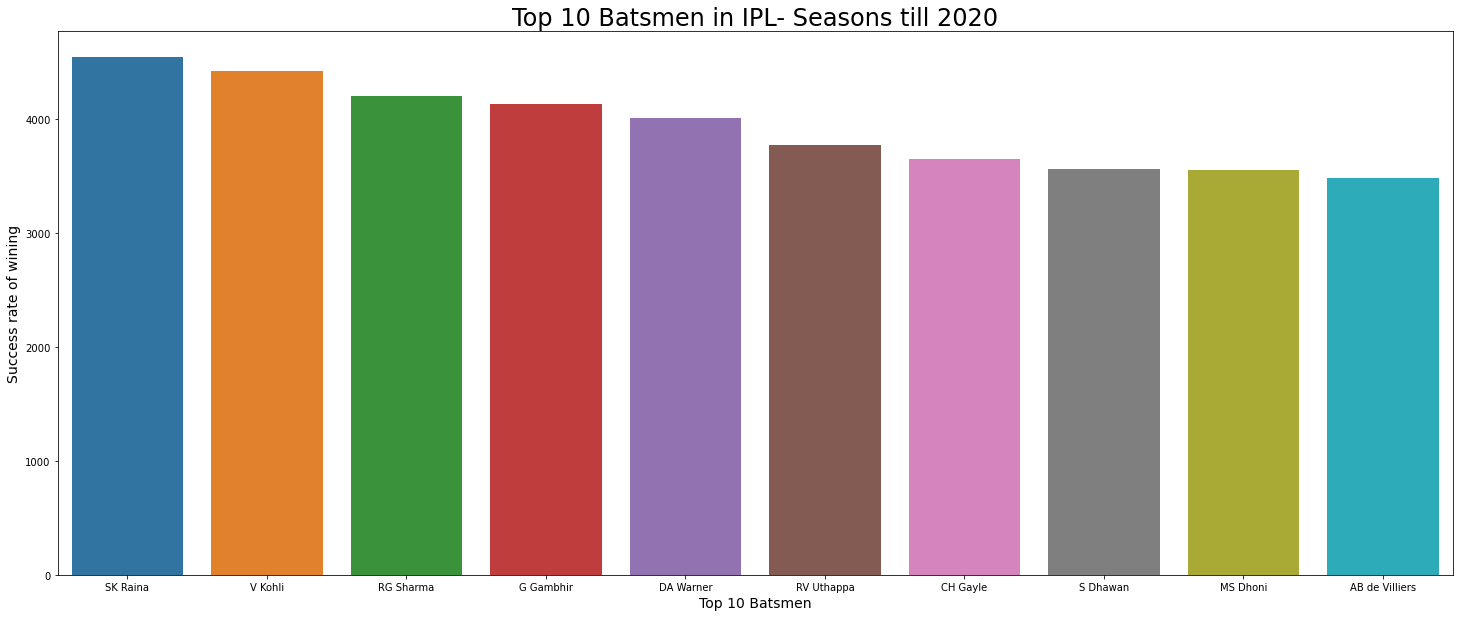

In [19]:
batting_tot=deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
x = top_batsmen.batsman
y = top_batsmen.Runs
df1=pd.DataFrame(list(zip(x,y)),columns = ['x','y'] ) 
plt.figure(figsize=(25,10)) 
sns.barplot(x = 'x',y = 'y',data = df1)
plt.title("Top 10 Batsmen in IPL- Seasons till 2020", size=24)
plt.ylabel("Success rate of wining", size=14)
plt.xlabel("Top 10 Batsmen", size=14)
plt.show()

### Most Titles Wins

<ipython-input-20-05e1ccf6675e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  each_season_winner =matches.groupby('season')['season','winner'].tail(1)


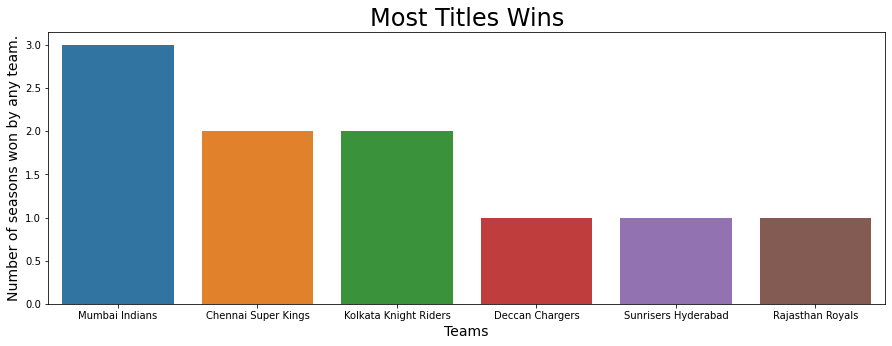

In [20]:
each_season_winner =matches.groupby('season')['season','winner'].tail(1)
each_season_winner_sort = each_season_winner.sort_values('season',ascending = True)
x = each_season_winner_sort["winner"].value_counts().index
y = each_season_winner_sort["winner"].value_counts().values
df1=pd.DataFrame(list(zip(x,y)),columns = ['x','y'] ) 
plt.figure(figsize=(15,5)) 
sns.barplot(x = 'x',y = 'y',data = df1)
plt.title("Most Titles Wins", size=24)
plt.ylabel("Number of seasons won by any team.", size=14)
plt.xlabel("Teams", size=14)
plt.show()

### Top 10 bowlers till 2020

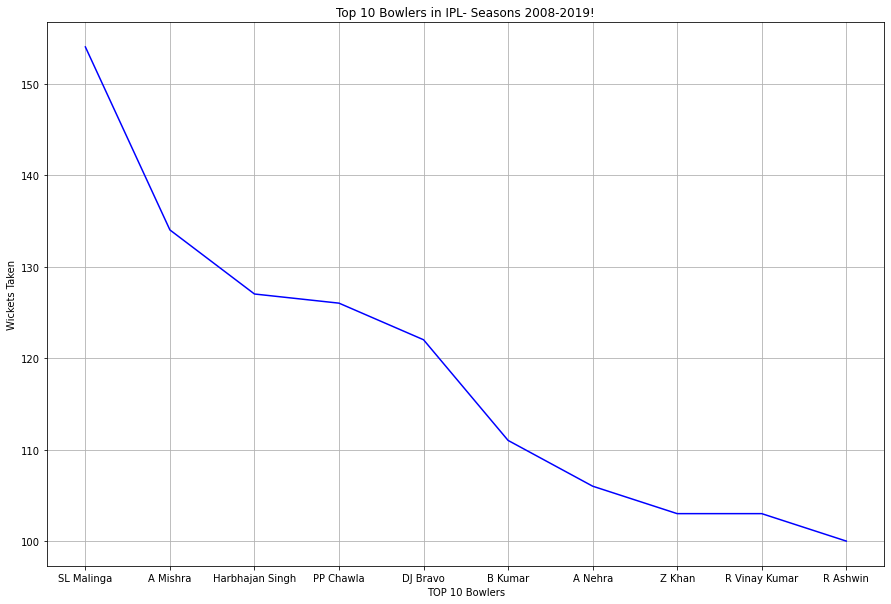

In [21]:
bowling_wickets=deliveries[deliveries['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
x = top_bowlers['bowler'].values
y = top_bowlers['Wickets'].values
plt.figure(figsize=(15,10)) 
plt.plot(x,y,color='blue')
plt.title('Top 10 Bowlers in IPL- Seasons 2008-2019!')
plt.xlabel('TOP 10 Bowlers')
plt.ylabel('Wickets Taken')
plt.grid(True)
plt.show()

### Top 10 Cities by Number Of matches

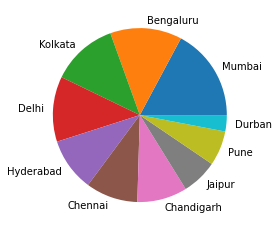

In [22]:
city_counts= matches.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:10]
plt.pie(top_cities["Match Counts"].values, labels = top_cities.city) 
plt.show()

### Top 10 Umpire to feature in max number of matches

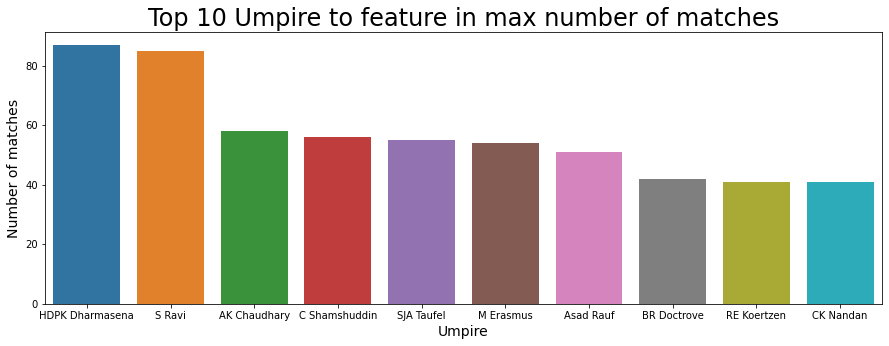

In [23]:
data = pd.DataFrame({"umpire":matches["umpire1"].tolist() +matches["umpire2"].tolist()},columns=['umpire'])
x = data["umpire"].value_counts().index[:10]
y = data["umpire"].value_counts().values[:10]
plt.figure(figsize=(15,5)) 
df1=pd.DataFrame(list(zip(x,y)),columns = ['x','y'] ) 
sns.barplot(x = 'x',y = 'y',data = df1)
plt.title("Top 10 Umpire to feature in max number of matches", size=24)
plt.ylabel("Number of matches", size=14)
plt.xlabel("Umpire", size=14)
plt.show()

### Top 10 Best Fielders in the Field

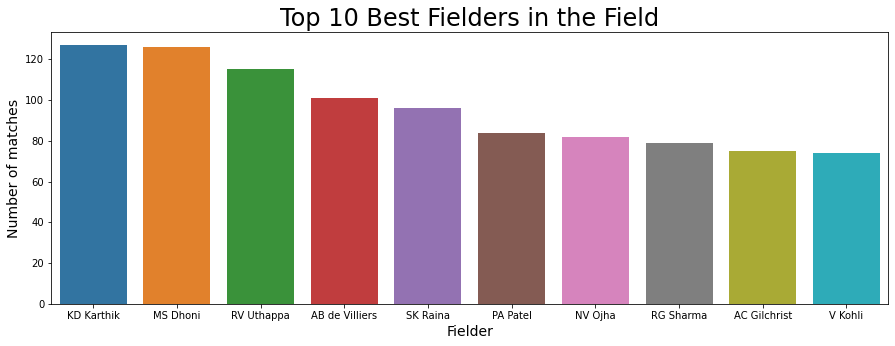

In [24]:
x =deliveries["fielder"].value_counts().index[:10]
y = deliveries["fielder"].value_counts().values[:10]
plt.figure(figsize=(15,5)) 
df1=pd.DataFrame(list(zip(x,y)),columns = ['x','y'] ) 
sns.barplot(x = 'x',y = 'y',data = df1)
plt.title("Top 10 Best Fielders in the Field", size=24)
plt.ylabel("Number of matches", size=14)
plt.xlabel("Fielder", size=14)
plt.show()

### Most Likely Decision After Winning Toss

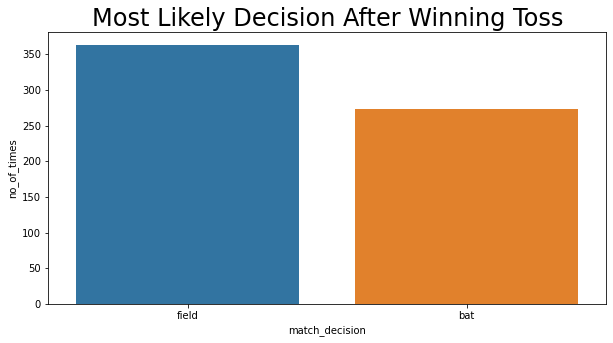

In [25]:
match_decision = matches["toss_decision"].value_counts().index
no_of_times = matches["toss_decision"].value_counts().values
plt.figure(figsize=(10,5)) 
df1=pd.DataFrame(list(zip(match_decision,no_of_times)),columns = ['match_decision','no_of_times'] ) 
sns.barplot(x = 'match_decision',y = 'no_of_times',data = df1)
plt.title("Most Likely Decision After Winning Toss", size=24)
plt.show()

In [26]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,Rajiv Gandhi International Stadium,AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [27]:
dicVal = encode['winner']
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,5.371069,5.309748
std,3.329169,3.341677,3.293140,3.288726
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.250000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [28]:
df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,Rajiv Gandhi International Stadium,10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bengaluru,bat,3,M. Chinnaswamy Stadium,3
5,8,10,Hyderabad,field,10,Rajiv Gandhi International Stadium,10
6,2,1,Mumbai,field,1,Wankhede Stadium,1
7,3,9,Indore,bat,3,Holkar Cricket Stadium,9
8,7,11,Pune,field,11,Maharashtra Cricket Association Stadium,7
9,10,1,Mumbai,field,1,Wankhede Stadium,1


### DATA PREPROCESSING STEP - 
##### Encoding categorical variables 

In [29]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder

labelencoder_c = LabelEncoder()
df['city']= labelencoder_c.fit_transform(df['city'])
labelencoder_t = LabelEncoder()
df['toss_decision']= labelencoder_t.fit_transform(df['toss_decision'])
labelencoder_v = LabelEncoder()
df['venue']= labelencoder_v.fit_transform(df['venue'])
df.dtypes

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

## IPL MATCH WINNER PREDICTION USING DIFFERENT CLASSIFIER AND THEIR PERFORMANCE

In [30]:
X = df[['team1','team2','toss_winner']]
y = df.winner

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Measuring accuracy of the result using logistic
from sklearn import metrics
accuracy = metrics.accuracy_score(y_pred,y_test)
print('Accuracy : %s' % '{0:.3%}'.format(accuracy))


Accuracy : 18.868%


[[18  5  3  0  1  0  0  0  0  0  0  0  0  0]
 [13  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  4  1  0  3  1  1  0  2  0  0  0  0  0]
 [ 4  1  0  0  1  0  0  0  1  0  0  0  0  0]
 [14  0  0  0  1  0  0  0  6  0  0  0  0  0]
 [ 2  2  3  0  2  0  0  0 11  0  0  0  0  0]
 [ 0  5  2  0  2  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  3  0  0  0  0  0]
 [ 0  1  1  0  1  0  0  0  6  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  2  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]]


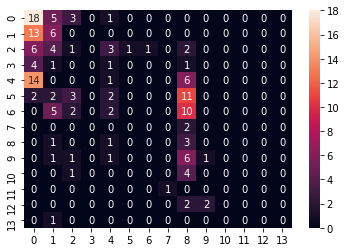

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# Plotting the Confusion Matrix
sns.heatmap(cm,annot=True)
print(cm)


In [32]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,
                             cv=10)
# if u r working on large no of observations then take n_jobs=-1 where -1 means u r using all the CPUs..
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std()))


0.22 accuracy with a standard deviation of 0.04


C:\Users\TS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


###### Using Random Forest Regressor

In [33]:
X = df[['team1','team2','venue', 'toss_winner','city','toss_decision']]
y = df.winner

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier

classifierRF = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
classifierRF.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifierRF.predict(X_test)


#Measuring accuracy of the result using Random forest
from sklearn import metrics
accuracy = metrics.accuracy_score(y_pred,y_test)
print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy : 50.943%


[[15  2  1  0  2  1  0  1  5  0  0  0  0  0]
 [ 1 11  3  1  1  0  0  0  2  0  0  0  0  0]
 [ 3  1  6  2  0  1  0  0  3  1  1  0  0  0]
 [ 0  1  1  2  1  0  0  0  2  0  0  0  0  0]
 [ 6  0  1  0 11  0  0  0  2  1  0  0  0  0]
 [ 1  0  2  0  0 11  3  0  3  0  0  0  0  0]
 [ 0  2  3  1  3  0  6  0  1  1  1  0  1  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  1  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  3  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]]


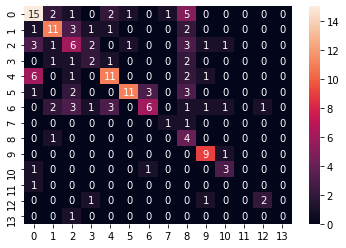

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# Plotting the Confusion Matrix
sns.heatmap(cm,annot=True)
print(cm)

In [35]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifierRF, X=X_train, y=y_train,
                             cv=10)
# if u r working on large no of observations then take n_jobs=-1 where -1 means u r using all the CPUs..
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std()))


C:\Users\TS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.48 accuracy with a standard deviation of 0.07


In [36]:
df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,13,1,3,22,10
1,1,11,24,1,11,16,11
2,8,2,26,1,2,24,2
3,11,9,14,1,9,11,9
4,3,7,2,0,3,14,3
5,8,10,13,1,10,22,10
6,2,1,21,1,1,33,1
7,3,9,14,0,3,11,9
8,7,11,24,1,11,16,7
9,10,1,21,1,1,33,1


## MATCH WINNER PREDICTION

In [37]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='KKR'
toss_winner='RCB'
i=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
i = np.array(i).reshape((1, -1))
output=classifierRF.predict(i)

print(list(dicVal.keys())[list(dicVal.values()).index(output)])

KKR


In [38]:
team1='DC'
team2='DD'
toss_winner='DC'
i=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
i = np.array(i).reshape((1, -1))
output=classifierRF.predict(i)

print(list(dicVal.keys())[list(dicVal.values()).index(output)])

DD
